<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/Patrones/Tareas/Tarea2LabPatrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.
* a) Carga el dataset completo de Mnist y usa PCA para reducirlo a 2 componentes. Finalmente separa los datos correspondientes a 1,5 y 7.  Gráfica los datos.
* b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de clasificación.
* c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
#mnist = mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X: ' + str(X_train.shape))
print('Y: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
X: (60000, 28, 28)
Y: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
y_train[788]

9

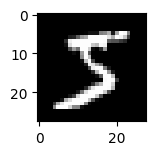

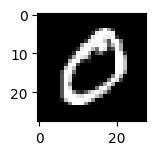

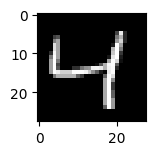

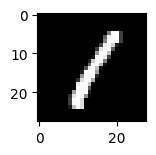

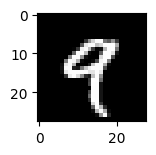

In [ ]:
for i in range(5):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [ ]:
# Aplanar las imágenes
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print('X_train_flat:', X_train_flat.shape)
print('X_test_flat:', X_test_flat.shape)

X_train_flat: (60000, 784)
X_test_flat: (10000, 784)


In [ ]:
# Estandarizar
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_flat)
X_test_std = sc.transform(X_test_flat)

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes principales según tus necesidades
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

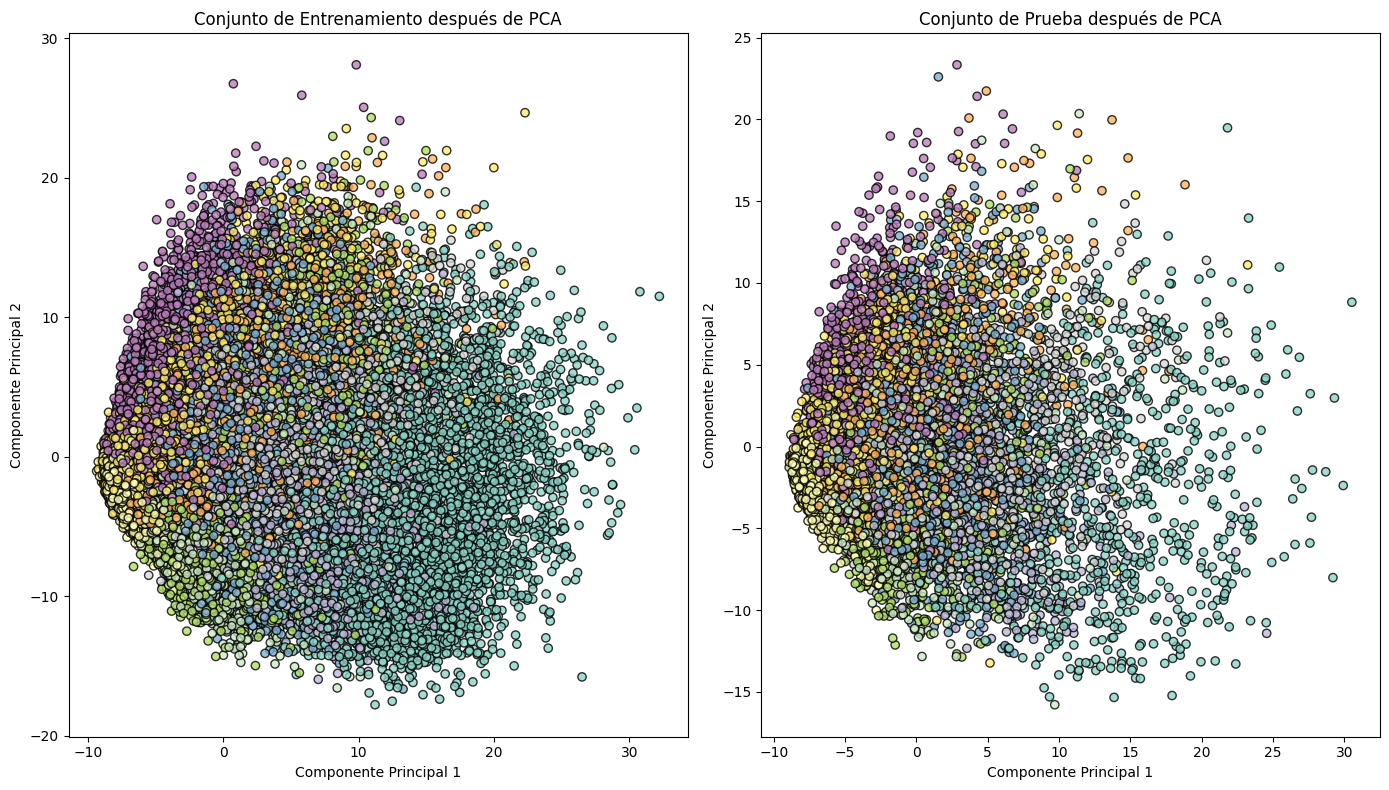

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(14, 8))

# Scatter plot para el conjunto de entrenamiento después de PCA
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Set3', edgecolors='k', alpha=0.8)
plt.title('Conjunto de Entrenamiento después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Scatter plot para el conjunto de prueba después de PCA
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='Set3', edgecolors='k', alpha=0.8)
plt.title('Conjunto de Prueba después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

In [ ]:
# Seleccionar muestras con etiquetas 1, 5 y 7
selected_labels = [1, 5, 7]

train_mask = np.isin(y_train, selected_labels)
test_mask = np.isin(y_test, selected_labels)

X_train157 = X_train_pca[train_mask]
X_test157 = X_test_pca[test_mask]
y_train157 = y_train[train_mask]
y_test157 = y_test[test_mask]

<ipython-input-58-7bc9cd94e58a>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train157[indices, 0], X_train157[indices, 1],
<ipython-input-58-7bc9cd94e58a>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test157[indices, 0], X_test157[indices, 1],


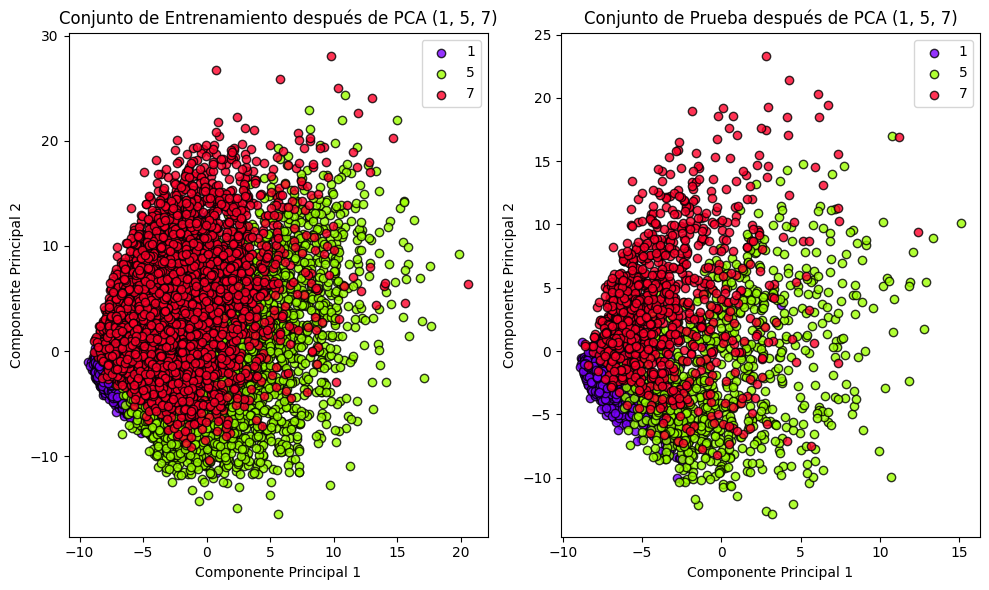

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot para el conjunto de entrenamiento después de PCA
plt.subplot(1, 2, 1)
for label in selected_labels:
    indices = (y_train157 == label)
    plt.scatter(X_train157[indices, 0], X_train157[indices, 1],
                c=plt.cm.gist_rainbow_r(label / max(selected_labels)), edgecolors='k', alpha=0.8,
                label=f'{label}')

plt.title('Conjunto de Entrenamiento después de PCA (1, 5, 7)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Scatter plot para el conjunto de prueba después de PCA
plt.subplot(1, 2, 2)
for label in selected_labels:
    indices = (y_test157 == label)
    plt.scatter(X_test157[indices, 0], X_test157[indices, 1],
                c=plt.cm.gist_rainbow_r(label / max(selected_labels)), edgecolors='k', alpha=0.8,
                label=f'{label}')

plt.title('Conjunto de Prueba después de PCA (1, 5, 7)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Algoritmo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train157, y_train157)
knn_pred = knn.predict(X_test157)
knn_accuracy = accuracy_score(y_test157, knn_pred)

print(f'Accuracy KNN: {knn_accuracy:.4f}')

Accuracy KNN: 0.8108


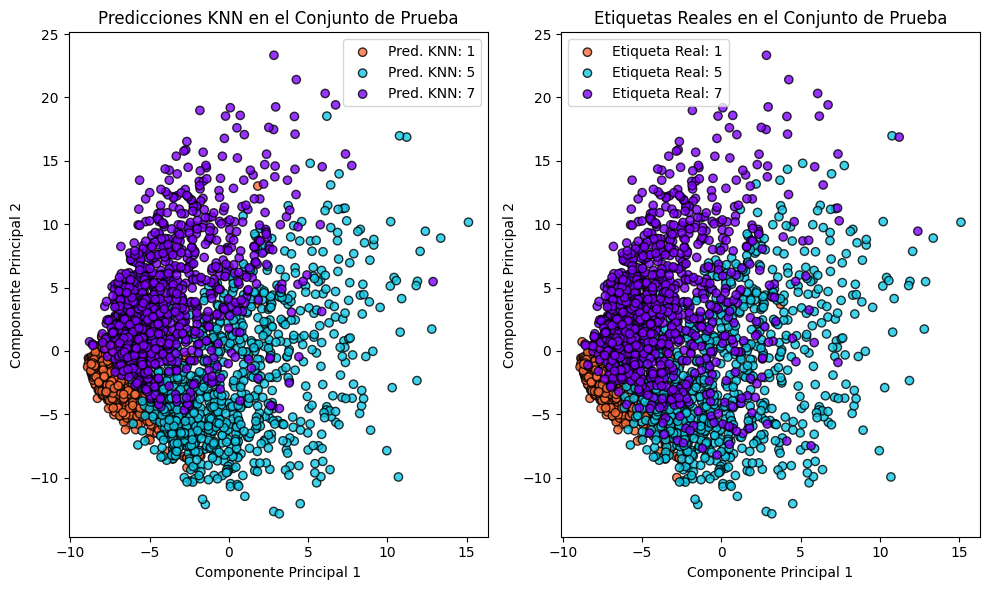

In [ ]:
# Visualizar los resultados del KNN y las etiquetas reales en subplots individuales
plt.figure(figsize=(10, 6))

# Scatter plot para el conjunto de prueba después de PCA - Predicciones KNN
plt.subplot(1, 2, 1)
for label in selected_labels:
    indices = (knn_pred == label)
    plt.scatter(X_test157[indices, 0], X_test157[indices, 1], c=[plt.cm.rainbow_r(label / max(selected_labels))] * np.sum(indices), edgecolors='k', alpha=0.8, label=f'Pred. KNN: {label}')

plt.title('Predicciones KNN en el Conjunto de Prueba')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Scatter plot para el conjunto de prueba después de PCA - Etiquetas Reales
plt.subplot(1, 2, 2)
for label in selected_labels:
    indices = (y_test157 == label)
    plt.scatter(X_test157[indices, 0], X_test157[indices, 1], c=[plt.cm.rainbow_r(label / max(selected_labels))] * np.sum(indices), edgecolors='k', alpha=0.8, label=f'Etiqueta Real: {label}')

plt.title('Etiquetas Reales en el Conjunto de Prueba')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

plt.tight_layout()
plt.show()


Método de Eileen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [ ]:
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

# 2.
(a) Carga el dataset completo de Mnist y usa LDA para reducirlo a 2 componentes. Finalmente separa los datos correspondientes a 1, 5 y 7. Gráfica los datos.

(b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de clasificación.

(c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

# 3.
Discutan en equipos los reportes de clasificación de los inciso 1b y 2b. ¿Qué modelo es mejor para separar estas clases y clasificar las mediante K-NN?

# 4.
De acuerdo a lo visto en clase sobre el perceptrón simple.

(a) Mencionen el valor del peso wj correspondiente al valor del bias o sesgo que se obtiene en clase.

(b) Creen una función que calcule el valor predicho por la neurona sin modificar los pesos de la red.

(c) Cree una función que calcule el error cuadrático medio(ECM).

(d) Realiza una gráfica de linea del comportamiento del ECM para 30 épocas. Usando n = 1, .2, .02 ¿Cuál o cuales valores de n (taza de aprendizaje) funcionan de forma más adecuada?¿Cuales no? Argumente su respuestas ayudándose de la gráfica.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict(inputs, weights):
    # Calcula el valor predicho por la neurona
    return np.dot(inputs, weights)

def mean_squared_error(targets, predictions):
    # Calcula el error cuadrático medio
    return np.mean((targets - predictions) ** 2)

def train_perceptron(inputs, targets, learning_rate, epochs):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]
    weights = np.random.rand(num_inputs)  # Inicializamos los pesos de manera aleatoria

    errors = []  # Almacenamos los errores para graficar

    for epoch in range(epochs):
        predictions = predict(inputs, weights)
        error = mean_squared_error(targets, predictions)
        errors.append(error)

        # Actualizamos los pesos utilizando el algoritmo de aprendizaje del perceptrón
        weights += learning_rate * np.dot(inputs.T, targets - predictions) / num_samples

    return errors

def plot_errors(errors, learning_rate):
    plt.plot(range(len(errors)), errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Error Cuadrático Medio')
    plt.legend()
    plt.show()

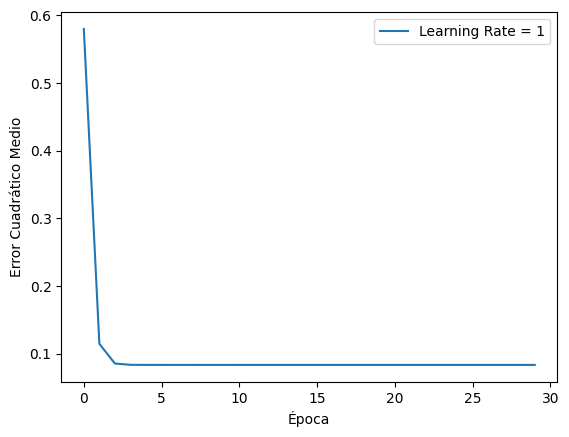

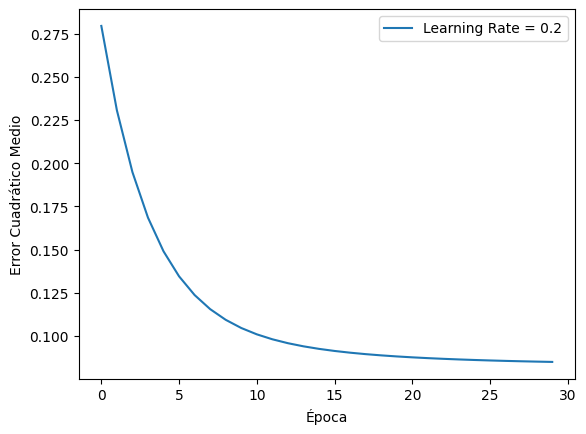

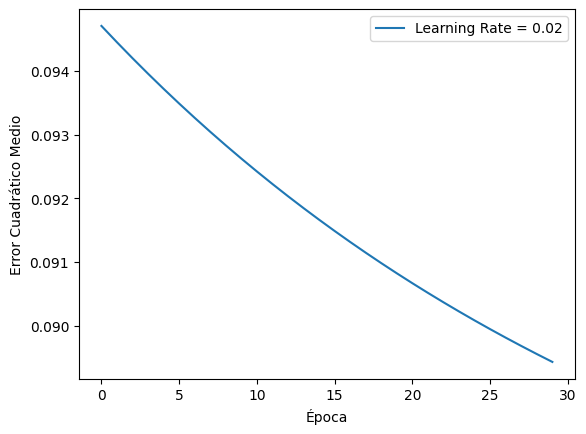

In [ ]:
# Datos de entrada y salida
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Tasas de aprendizaje
learning_rates = [1, 0.2, 0.02]

# Número de épocas
epochs = 30

# Entrenamos y graficamos para diferentes tasas de aprendizaje
for learning_rate in learning_rates:
    errors = train_perceptron(inputs, targets, learning_rate, epochs)
    plot_errors(errors, learning_rate)

In [ ]:
!pip install python-mnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

def load_data():
    mndata = MNIST()  # Ajusta la ruta a tu directorio MNIST
    images, labels = mndata.load_training()

    # Filtrar imágenes y etiquetas para solo incluir 1, 5 y 7
    indices = [i for i in range(len(labels)) if labels[i] in [1, 5, 7]]
    images = np.array([images[i] for i in indices])
    labels = np.array([labels[i] for i in indices])

    # Normalizar las imágenes
    images = np.array(images) / 255.0

    return images, labels

def predict(inputs, weights):
    return np.dot(inputs, weights)

def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def train_perceptron(inputs, targets, learning_rate, epochs):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]
    weights = np.random.rand(num_inputs)

    errors = []

    for epoch in range(epochs):
        predictions = predict(inputs, weights)
        error = mean_squared_error(targets, predictions)
        errors.append(error)

        weights += learning_rate * np.dot(inputs.T, targets - predictions) / num_samples

    return errors

def plot_errors(errors, learning_rate):
    plt.plot(range(len(errors)), errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Error Cuadrático Medio')
    plt.legend()
    plt.show()

# Cargar datos
images, labels = load_data()

# Seleccionar solo algunas imágenes y etiquetas para este ejemplo
selected_indices = np.random.choice(len(labels), size=100, replace=False)
selected_images = images[selected_indices]
selected_labels = labels[selected_indices]

# Crear la matriz de entrada (flatten de las imágenes)
inputs = selected_images.reshape((len(selected_images), -1))

# Establecer las etiquetas deseadas para 1, 5 y 7
targets = np.where(selected_labels == 1, 1, np.where(selected_labels == 5, 0, -1))

# Tasa de aprendizaje (puedes probar diferentes valores)
learning_rates = [1, 0.2, 0.02]

# Número de épocas
epochs = 30

# Entrenar y graficar para diferentes tasas de aprendizaje
for learning_rate in learning_rates:
    errors = train_perceptron(inputs, targets, learning_rate, epochs)
    plot_errors(errors, learning_rate)


FileNotFoundError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
from sklearn.decomposition import PCA

def load_data():
    mndata = MNIST('path/to/mnist/data')  # Ajusta la ruta a tu directorio MNIST
    images, labels = mndata.load_training()

    # Filtrar imágenes y etiquetas para solo incluir 1, 5 y 7
    indices = [i for i in range(len(labels)) if labels[i] in [1, 5, 7]]
    images = np.array([images[i] for i in indices])
    labels = np.array([labels[i] for i in indices])

    # Normalizar las imágenes
    images = np.array(images) / 255.0

    return images, labels

def apply_pca(images, n_components):
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(images)
    return reduced_images

def predict(inputs, weights):
    return np.dot(inputs, weights)

def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def train_perceptron(inputs, targets, learning_rate, epochs):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]
    weights = np.random.rand(num_inputs)

    errors = []

    for epoch in range(epochs):
        predictions = predict(inputs, weights)
        error = mean_squared_error(targets, predictions)
        errors.append(error)

        weights += learning_rate * np.dot(inputs.T, targets - predictions) / num_samples

    return errors

def plot_errors(errors, learning_rate):
    plt.plot(range(len(errors)), errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Error Cuadrático Medio')
    plt.legend()
    plt.show()

# Cargar datos
images, labels = load_data()

# Seleccionar solo algunas imágenes y etiquetas para este ejemplo
selected_indices = np.random.choice(len(labels), size=100, replace=False)
selected_images = images[selected_indices]
selected_labels = labels[selected_indices]

# Crear la matriz de entrada (flatten de las imágenes)
inputs = selected_images.reshape((len(selected_images), -1))

# Aplicar PCA para reducir la dimensionalidad
n_components = 20  # Ajusta el número de componentes principales según tus necesidades
reduced_inputs = apply_pca(inputs, n_components)

# Establecer las etiquetas deseadas para 1, 5 y 7
targets = np.where(selected_labels == 1, 1, np.where(selected_labels == 5, 0, -1))

# Tasa de aprendizaje (puedes probar diferentes valores)
learning_rates = [1, 0.2, 0.02]

# Número de épocas
epochs = 30

# Entrenar y graficar para diferentes tasas de aprendizaje
for learning_rate in learning_rates:
    errors = train_perceptron(reduced_inputs, targets, learning_rate, epochs)
    plot_errors(errors, learning_rate)


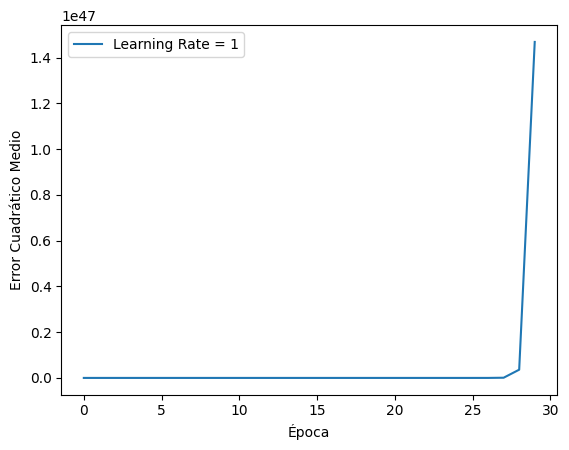

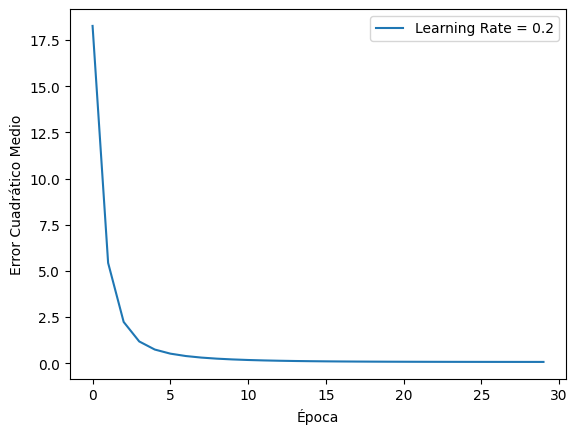

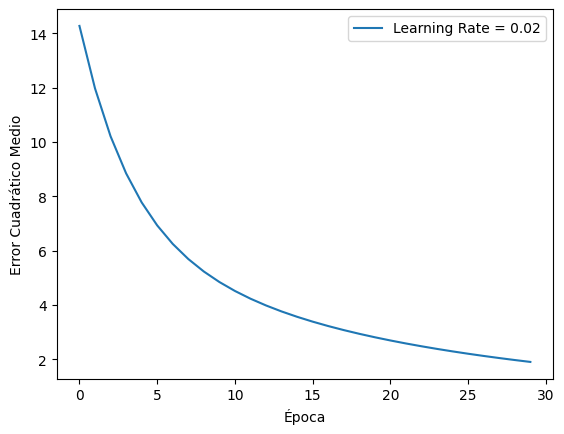

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

def load_data():
    # Cargar el conjunto de datos MNIST de Keras
    (images, labels), (_, _) = mnist.load_data()

    # Filtrar imágenes y etiquetas para solo incluir 1, 5 y 7
    indices = np.where((labels == 1) | (labels == 5) | (labels == 7))[0]
    images = images[indices]
    labels = labels[indices]

    # Normalizar las imágenes
    images = images / 255.0

    return images, labels

def apply_pca(images, n_components):
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(images.reshape(images.shape[0], -1))
    return reduced_images

def predict(inputs, weights):
    return np.dot(inputs, weights)

def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def train_perceptron(inputs, targets, learning_rate, epochs):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]
    weights = np.random.rand(num_inputs)

    errors = []

    for epoch in range(epochs):
        predictions = predict(inputs, weights)
        error = mean_squared_error(targets, predictions)
        errors.append(error)

        weights += learning_rate * np.dot(inputs.T, targets - predictions) / num_samples

    return errors

def plot_errors(errors, learning_rate):
    plt.plot(range(len(errors)), errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Error Cuadrático Medio')
    plt.legend()
    plt.show()

# Cargar datos
images, labels = load_data()

# Seleccionar solo algunas imágenes y etiquetas para este ejemplo
selected_indices = np.random.choice(len(labels), size=100, replace=False)
selected_images = images[selected_indices]
selected_labels = labels[selected_indices]

# Crear la matriz de entrada (flatten de las imágenes)
inputs = selected_images.reshape((len(selected_images), -1))

# Aplicar PCA para reducir la dimensionalidad
n_components = 20  # Ajusta el número de componentes principales según tus necesidades
reduced_inputs = apply_pca(inputs, n_components)

# Establecer las etiquetas deseadas para 1, 5 y 7
targets = np.where(selected_labels == 1, 1, np.where(selected_labels == 5, 0, -1))

# Tasa de aprendizaje (puedes probar diferentes valores)
learning_rates = [1, 0.2, 0.02]

# Número de épocas
epochs = 30

# Entrenar y graficar para diferentes tasas de aprendizaje
for learning_rate in learning_rates:
    errors = train_perceptron(reduced_inputs, targets, learning_rate, epochs)
    plot_errors(errors, learning_rate)
